# ANÁLISE DO VALOR DA CONTA EM UM RESTAURANTE

# Inicializando os dados 

In [201]:
import pandas as pd

In [202]:
dados = pd.read_csv('tips.csv')

# Tradução

In [203]:
#Traduzindo as colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [204]:
#Traduzindo os nomes das colunas
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'   
}

In [205]:
dados = dados.rename(columns = renomear)

In [206]:
dados.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
242,17.82,1.75,No,Sat,Dinner,2
143,27.05,5.00,No,Thur,Lunch,6
225,16.27,2.50,Yes,Fri,Lunch,2
127,14.52,2.00,No,Thur,Lunch,2
21,20.29,2.75,No,Sat,Dinner,2


In [207]:
dados.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [208]:
#Traduzindo os valores da coluna 'Sobremesa'
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [209]:
dados.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [210]:
dados.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
179,34.63,3.55,Yes,Sun,Dinner,2
70,12.02,1.97,No,Sat,Dinner,2
3,23.68,3.31,No,Sun,Dinner,2
171,15.81,3.16,Yes,Sat,Dinner,2
132,11.17,1.50,No,Thur,Lunch,2


In [211]:
#Aplicando a tradução dos valores da coluna 'Sobremesa'
dados.sobremesa = dados.sobremesa.map(sim_nao)

In [212]:
dados.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
51,10.29,2.60,Não,Sun,Dinner,2
178,9.60,4.00,Sim,Sun,Dinner,2
207,38.73,3.00,Sim,Sat,Dinner,4
193,15.48,2.02,Sim,Thur,Lunch,2
96,27.28,4.00,Sim,Fri,Dinner,2


In [213]:
dados.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [214]:
#Traduzindo os valores da coluna 'dia_da_semana' 
dias = {
    'Sun' : 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

In [215]:
#Aplicando tradução à coluna 'dia_da_semana'
dados.dia_da_semana = dados.dia_da_semana.map(dias)

In [216]:
dados.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
105,15.36,1.64,Sim,Sábado,Dinner,2
213,13.27,2.50,Sim,Sábado,Dinner,2
5,25.29,4.71,Não,Domingo,Dinner,4
72,26.86,3.14,Sim,Sábado,Dinner,2
129,22.82,2.18,Não,Quinta,Lunch,3


In [217]:
# Verificando valores de 'hora_do_dia'
dados.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [218]:
# Traduzindo valores de 'hora_do_dia'
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [219]:
# Aplicando tradução aos valores da coluna 'hora_do_dia'
dados.hora_do_dia = dados.hora_do_dia.map(hora)

In [220]:
dados.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
171,15.81,3.16,Sim,Sábado,Jantar,2
8,15.04,1.96,Não,Domingo,Jantar,2
95,40.17,4.73,Sim,Sexta,Jantar,4
145,8.35,1.50,Não,Quinta,Almoço,2
5,25.29,4.71,Não,Domingo,Jantar,4


In [221]:
#Verificando o dataset
dados

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# Analisando o valor da conta 

## Introdução

Façamos uma breve análise do valor da conta.

In [222]:
#Distribuição estatística do valor da conta. 
dados.valor_da_conta.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: valor_da_conta, dtype: float64

De forma bastante sucinta, vemos que o valor da conta está majoritariamente concentrado entre 13 e 25 dólares. Façamos um histograma para visualizar melhor essa informação.

<AxesSubplot:>

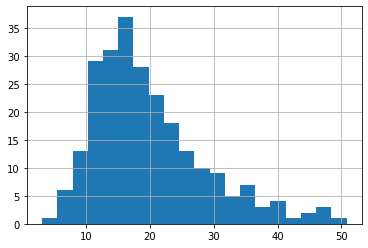

In [223]:
#Plotando o histograma da coluna valor_da_conta
dados.valor_da_conta.hist(bins=20)

Esta informação por si só não diz muito. Precisamos encontar como o valor da conta se relaciona com os outros dados do dataset.

## Valor da conta X gorjeta

In [224]:
#Importando a biblioteca seaborn
import seaborn as sns

Como primeiro exemplo, visualizaremos a relação entre a gorjeta e o valor da conta por meio de um gráfico tipo 'scatterplot'. 

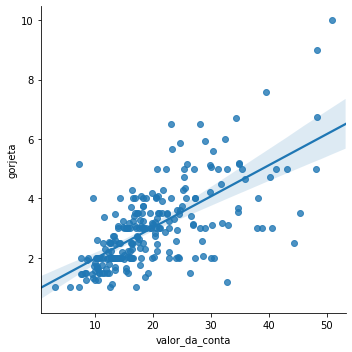

In [225]:
#Visualizando a correlação entre a gorjeta e o valor da conta
valor_gorjeta = sns.lmplot(x='valor_da_conta',y='gorjeta',data=dados)

Visualmente, o valor da gorjeta tende a aumentar conforme o valor da conta aumenta.

## Valor da conta X sobremesa

<AxesSubplot:xlabel='sobremesa', ylabel='valor_da_conta'>

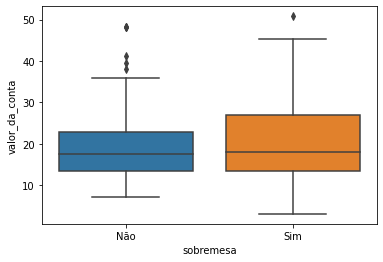

In [226]:
#
sns.boxplot(x='sobremesa',y='valor_da_conta', data=dados)

In [227]:
#Analisando a gorjeta de quem consumiu sobremesa
dados_com_sobremesa = dados[dados.sobremesa == 'Sim']
dados_com_sobremesa.describe()

,valor_da_conta,gorjeta,total_de_pessoas
count,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602
std,9.832154,1.401468,0.810751
min,3.070000,1.000000,1.000000
25%,13.420000,2.000000,2.000000
50%,17.920000,3.000000,2.000000
75%,26.860000,3.680000,3.000000
max,50.810000,10.000000,5.000000


In [228]:
#Analisando a gorjeta de quem consumiu sobremesa
dados_sem_sobremesa = dados[dados.sobremesa == 'Não']
dados_sem_sobremesa.describe()

,valor_da_conta,gorjeta,total_de_pessoas
count,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874
std,8.255582,1.377190,1.017984
min,7.250000,1.000000,1.000000
25%,13.325000,2.000000,2.000000
50%,17.590000,2.740000,2.000000
75%,22.755000,3.505000,3.000000
max,48.330000,9.000000,6.000000


Como analisar a relação entre o valor da conta e ter ou não sobremesa?

## Valor da conta X hora do dia

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

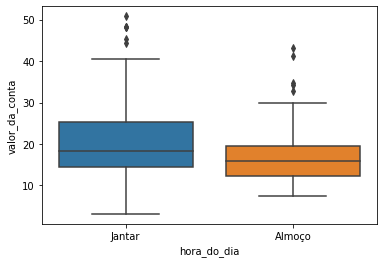

In [229]:
#
sns.boxplot(x='hora_do_dia',y='valor_da_conta', data=dados)

Como analisar o valor da conta com a hora do dia?

## Valor da conta X dia da semana

<AxesSubplot:>

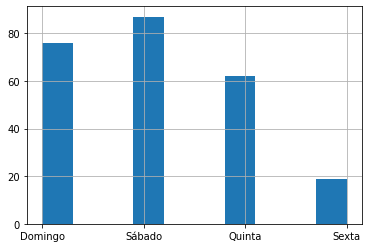

In [230]:
#
dados.dia_da_semana.hist()

Como analisar o valor da conta com o dia da semana?